### Importing Necessary Modules

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Load the Dataset

In [95]:
df = pd.read_csv("/content/diabetes.csv")

In [96]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [97]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [98]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [99]:
df["BMI"] = df["BMI"].replace(0,df["BMI"].mean())
df["Glucose"] = df["Glucose"].replace(0,df["Glucose"].mean())
df["SkinThickness"] = df["SkinThickness"].replace(0,df["SkinThickness"].mean())
df["Insulin"] = df["Insulin"].replace(0,df["Insulin"].mean())
df["BloodPressure"] = df["BloodPressure"].replace(0,df["BloodPressure"].mean())

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Pregnancies'),
  Text(1, 0, 'Glucose'),
  Text(2, 0, 'BloodPressure'),
  Text(3, 0, 'SkinThickness'),
  Text(4, 0, 'Insulin'),
  Text(5, 0, 'BMI'),
  Text(6, 0, 'DiabetesPedigreeFunction'),
  Text(7, 0, 'Age'),
  Text(8, 0, 'Outcome')])

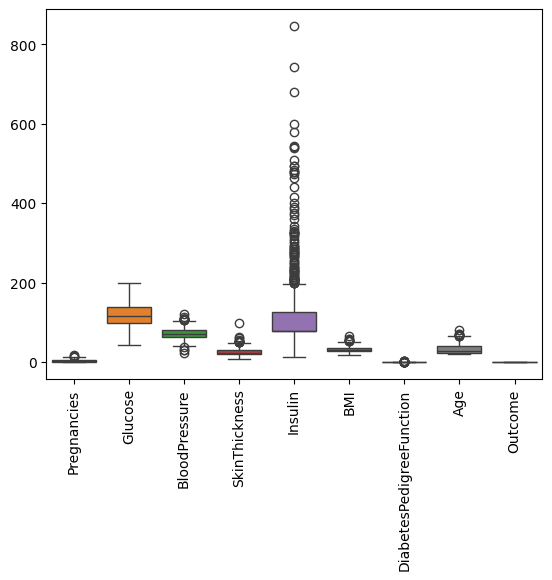

In [100]:
sns.boxplot(df)
plt.xticks(rotation=90)

### Dependent & Independent Features

In [101]:
X = df.drop("Outcome",axis=1)
y = df["Outcome"]

In [102]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [103]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### Train , Test & Split

In [104]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Scaling

In [105]:
def scaling(X_train,X_test):

  sc = StandardScaler()
  X_train_scaled = sc.fit_transform(X_train)
  X_test_scaled = sc.transform(X_test)

  pickle.dump(sc,open("scaler.pkl","wb"))

  return X_train_scaled, X_test_scaled

In [106]:
X_train_scaled,X_test_scaled = scaling(X_train,X_test)

In [107]:
X_train_scaled

array([[-0.52639686, -1.25806262, -0.24875152, ..., -0.05130551,
        -0.49073479, -1.03594038],
       [ 1.58804586, -0.32713796,  0.81650936, ..., -0.5985773 ,
         2.41502991,  1.48710085],
       [-0.82846011,  0.57053938, -2.15757252, ..., -0.52642693,
         0.54916055, -0.94893896],
       ...,
       [ 1.8901091 , -0.69285836,  1.1469629 , ...,  1.91225539,
         1.981245  ,  0.44308379],
       [-1.13052335,  0.637034  , -0.24875152, ...,  1.45049306,
        -0.78487662, -0.33992901],
       [-1.13052335,  0.10507706,  1.97309676, ..., -1.42109145,
        -0.61552223, -1.03594038]])

### Model Training

In [108]:
model = LogisticRegression()
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [109]:
y_pred = model.predict(X_test_scaled)

In [110]:
accuracy_score(y_test,y_pred)

0.7662337662337663

In [111]:
confusion_matrix(y_test,y_pred)

array([[83, 16],
       [20, 35]])

In [112]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



### HyperParameter Tuning

In [113]:
params = {
    "penalty":["l1","l2","elasticnet"],
    "C":[1,3,5,10],
    "max_iter":[200,300,500]
}

In [114]:
clf = GridSearchCV(model,params,scoring="accuracy",cv=5,n_jobs=-1)

In [115]:
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 3, 5, 10], 'max_iter': [200, 300, 500],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [116]:
clf.best_params_

{'C': 1, 'max_iter': 200, 'penalty': 'l2'}

In [117]:
clf.best_score_

0.7703985072637611

In [118]:
y_pred = clf.predict(X_test_scaled)

In [119]:
accuracy_score(y_test,y_pred)

0.7662337662337663

In [120]:
confusion_matrix(y_test,y_pred)

array([[83, 16],
       [20, 35]])

In [121]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



### Pickling

In [122]:
pickle.dump(model,open("model.pkl","wb"))